In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('../diabetes.csv')
diabetes_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_history,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [3]:
selected_features = ['drinking', 'Age', 'HDL', 'smoking', 'LDL', 'SBP', 'BMI', 'Gender', 'family_history', 'Chol', 'DBP']
X = diabetes_data[selected_features]
y = diabetes_data['Diabetes']

### Determine the optimal training size and optimal k value

The optimal k value is determined for each training size and for each metrics (accuracy, precision, f1_score and recall)

From the table, we can see that training sizes of 0.8 and 0.9 are in a close competition in terms of all 4 metrics. So we will test and compare both of this training size

- Accuracy: Out of all the predictions we made, how many were true?
- Precision: Out of all the positive predictions we made, how many were true?
- Recall: Out of all the data points that should be predicted as true, how many did we correctly predict as true?
- F1 Score: F1 Score is a measure that combines recall and precision.



In [4]:
training_sizes = np.arange(0.1, 1.0, 0.1)  
k_values = range(1, 21)  
best_k_results = []

for training_size in training_sizes:
    best_k_accuracy = None
    best_accuracy = 0

    best_k_precision = None
    best_precision = 0

    best_k_recall = None
    best_recall = 0

    best_k_f1 = None
    best_f1 = 0

    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y, train_size=training_size, random_state=70
    )
    
    # Scale the data
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)

    for k in k_values:
        # Train the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_data, train_labels)

        # Predict on the test data
        predictions = knn.predict(test_data)

        # Calculate metrics
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions, average='binary')
        recall = recall_score(test_labels, predictions, average='binary')
        f1 = f1_score(test_labels, predictions, average='binary')

        # Update best k for each metric
        if accuracy > best_accuracy:
            best_k_accuracy = k
            best_accuracy = accuracy
        if precision > best_precision:
            best_k_precision = k
            best_precision = precision
        if recall > best_recall:
            best_k_recall = k
            best_recall = recall
        if f1 > best_f1:
            best_k_f1 = k
            best_f1 = f1

    # Append the results for this training size
    best_k_results.append({
        'Training Size': training_size,
        'Best k (Accuracy)': best_k_accuracy,
        'Accuracy': best_accuracy,
        'Best k (Precision)': best_k_precision,
        'Precision': best_precision,
        'Best k (Recall)': best_k_recall,
        'Recall': best_recall,
        'Best k (F1)': best_k_f1,
        'F1 Score': best_f1,
    })

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(best_k_results)

# Display the DataFrame
results_df

,Training Size,Best k (Accuracy),Accuracy,Best k (Precision),Precision,Best k (Recall),Recall,Best k (F1),F1 Score
0,0.1,6,0.932094,12,0.998870,1,0.818260,6,0.872516
1,0.2,9,0.931746,14,0.998734,1,0.833172,9,0.872491
2,0.3,6,0.930634,10,1.000000,1,0.833152,9,0.872015
3,0.4,6,0.929899,20,1.000000,1,0.829574,2,0.873103
4,0.5,8,0.935409,18,1.000000,1,0.826421,8,0.880687
5,0.6,8,0.934959,12,0.992500,1,0.828740,8,0.877462
6,0.7,17,0.938807,16,0.996656,1,0.832891,17,0.883994
7,0.8,10,0.943089,18,0.990000,1,0.837398,10,0.891353
8,0.9,12,0.944316,12,0.979798,1,0.831933,12,0.889908


### KNN model with train size of 90% and k value of 12

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
optimal_k = 12
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

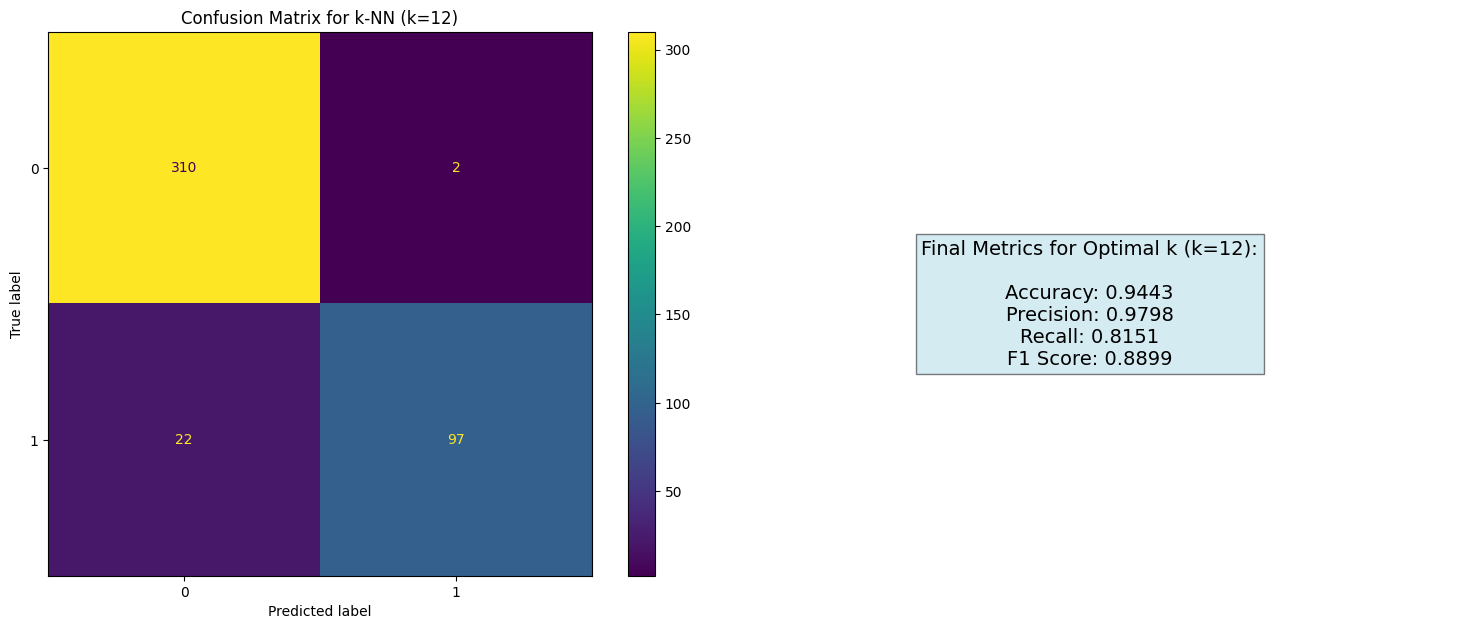

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimal, ax=ax[0], cmap="viridis")
ax[0].set_title(f"Confusion Matrix for k-NN (k={optimal_k})")

accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal, average='binary')
recall = recall_score(y_test, y_pred_optimal, average='binary')
f1 = f1_score(y_test, y_pred_optimal, average='binary')

metrics_text = (
    f"Final Metrics for Optimal k (k={optimal_k}):\n\n"
    f"Accuracy: {accuracy:.4f}\n"
    f"Precision: {precision:.4f}\n"
    f"Recall: {recall:.4f}\n"
    f"F1 Score: {f1:.4f}"
)
ax[1].axis("off")  
ax[1].text(0.5, 0.5, metrics_text, fontsize=14, ha="center", va="center", bbox=dict(facecolor="lightblue", alpha=0.5))

plt.tight_layout()
plt.show()


### KNN model with train size of 80% and k value of 10

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
optimal_k = 10
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

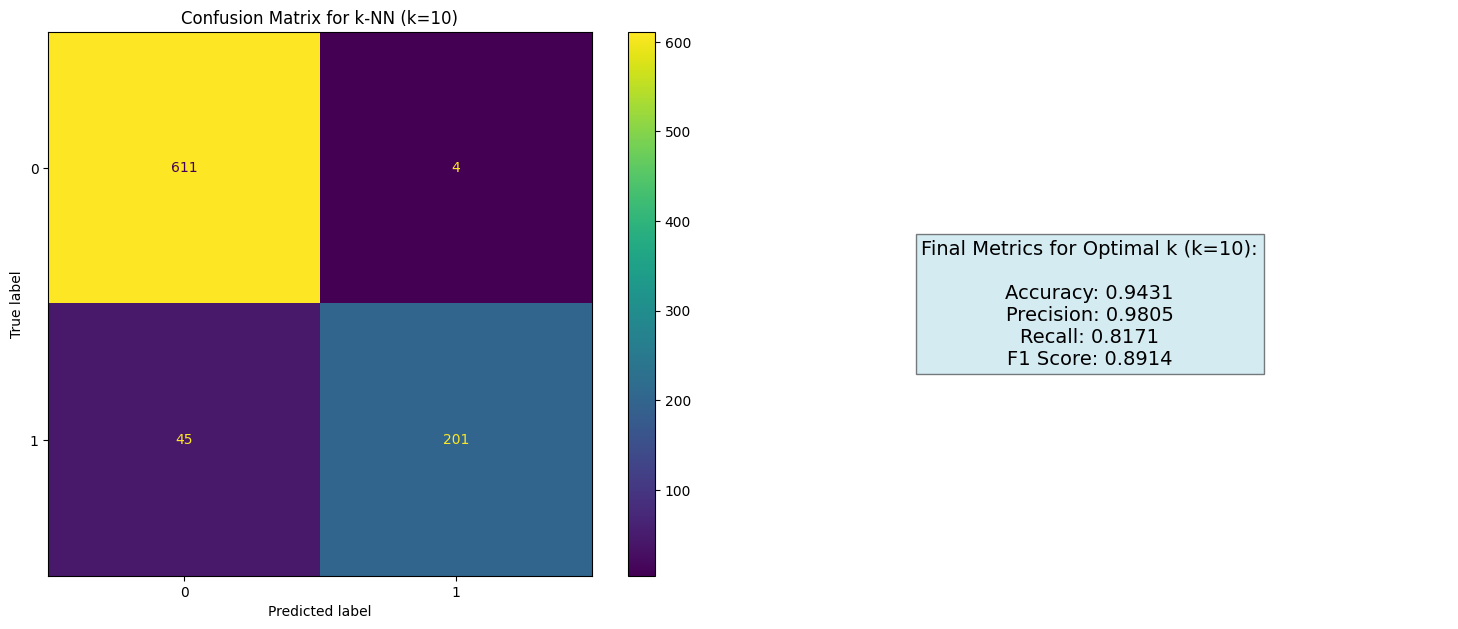

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimal, ax=ax[0], cmap="viridis")
ax[0].set_title(f"Confusion Matrix for k-NN (k={optimal_k})")

accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal, average='binary')
recall = recall_score(y_test, y_pred_optimal, average='binary')
f1 = f1_score(y_test, y_pred_optimal, average='binary')

metrics_text = (
    f"Final Metrics for Optimal k (k={optimal_k}):\n\n"
    f"Accuracy: {accuracy:.4f}\n"
    f"Precision: {precision:.4f}\n"
    f"Recall: {recall:.4f}\n"
    f"F1 Score: {f1:.4f}"
)
ax[1].axis("off")  
ax[1].text(0.5, 0.5, metrics_text, fontsize=14, ha="center", va="center", bbox=dict(facecolor="lightblue", alpha=0.5))

plt.tight_layout()
plt.show()

### Conclusion

Two different KNN models were tested and evaluated.
1. Train size of 90% and k value of 12.
2. Train size of 80% and k value of 10.

Both performed well on the test data sets with high scores. However, despite having a lower accuracy (less than 0.001 difference compared to model #1), it has a **higher F1 score which implies model #2 is able to strike a better balance between precision and recall, implying that it would be a better and less bias model.**